In [31]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from autograd import elementwise_grad as egrad
import datetime

In [32]:
vaccines = pd.read_csv("https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&metric=cumPeopleVaccinatedFirstDoseByPublishDate&metric=cumPeopleVaccinatedSecondDoseByPublishDate&metric=newPeopleVaccinatedFirstDoseByPublishDate&metric=newPeopleVaccinatedSecondDoseByPublishDate&format=csv")
cases = pd.read_csv("https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&metric=newCasesByPublishDate&metric=newCasesBySpecimenDate&metric=newCasesByPublishDateRollingRate&format=csv")

In [33]:
# data = data[["date", "areaName", "cumPeopleVaccinatedFirstDoseByPublishDate", "cumPeopleVaccinatedSecondDoseByPublishDate", "newPeopleVaccinatedFirstDoseByPublishDate", "newPeopleVaccinatedSecondDoseByPublishDate"]]
vaccines = vaccines.drop(["areaCode", "areaType"], axis=1)
vaccines["date"] = pd.to_datetime(vaccines['date'])
vaccines.info()

cases = cases.drop(["areaCode", "areaType"], axis=1)
cases["date"] = pd.to_datetime(cases['date'])
cases.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        228 non-null    datetime64[ns]
 1   areaName                                    228 non-null    object        
 2   cumPeopleVaccinatedFirstDoseByPublishDate   228 non-null    int64         
 3   cumPeopleVaccinatedSecondDoseByPublishDate  228 non-null    int64         
 4   newPeopleVaccinatedFirstDoseByPublishDate   224 non-null    float64       
 5   newPeopleVaccinatedSecondDoseByPublishDate  224 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 10.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype        

In [34]:
 vaccines

,date,areaName,cumPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,newPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate
0,2021-03-07,Scotland,1774659,118732,14909.0,2802.0
1,2021-03-06,Scotland,1759750,115930,15881.0,1849.0
2,2021-03-05,Scotland,1743869,114081,26197.0,5884.0
3,2021-03-04,Scotland,1717672,108197,29064.0,8139.0
4,2021-03-03,Scotland,1688608,100058,26729.0,7508.0
...,...,...,...,...,...,...
223,2021-01-14,Northern Ireland,114567,19264,11866.0,254.0
224,2021-01-13,Northern Ireland,102701,19010,11284.0,1170.0
225,2021-01-12,Northern Ireland,91417,17840,7230.0,2552.0
226,2021-01-11,Northern Ireland,84187,15288,6182.0,1339.0


In [37]:
tmp = vaccines.groupby("date").sum()
tmp["areaName"] = "total"
tmp = tmp.reset_index()

vaccines = vaccines.append(tmp)
vaccines = vaccines.set_index(["date", "areaName"])
vaccines["total_new"] = vaccines["newPeopleVaccinatedFirstDoseByPublishDate"] + vaccines["newPeopleVaccinatedSecondDoseByPublishDate"]

tmp = cases.groupby("date").sum()
tmp["areaName"] = "total"
tmp = tmp.reset_index()

cases = cases.append(tmp)
cases = cases.set_index(["date", "areaName"])

vaccine_totals = vaccines.xs("total", level=1)
cases_totals = cases.xs("total", level=1)


In [38]:
mvg_avg = vaccines.rolling(7).sum()/7


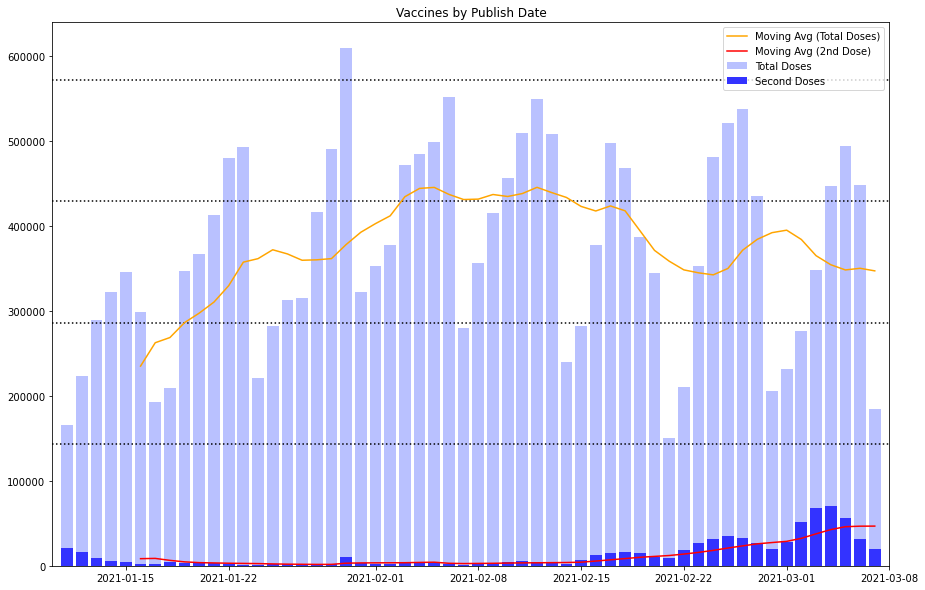

In [76]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)


plt.bar(list(vaccine_totals.index.get_level_values("date")), height = vaccines.xs("total", level=1)[["total_new"]].values.flatten(), fc=(.1, .2, 1, .3), label="Total Doses")
plt.bar(list(vaccine_totals.index.get_level_values("date")), height = vaccines.xs("total", level=1)[["newPeopleVaccinatedSecondDoseByPublishDate"]].values.flatten(), fc=(.2, .2, 1, 1), label="Second Doses")
plt.plot(mvg_avg.xs("total", level=1)[["total_new"]], color="orange", label="Moving Avg (Total Doses)")
plt.plot(mvg_avg.xs("total", level=1)[["newPeopleVaccinatedSecondDoseByPublishDate"]], color="red", label="Moving Avg (2nd Dose)")
plt.xlim("2021-01-10", datetime.date.today())
plt.hlines(1*10**6/7, "2021-01-10", datetime.date.today(), color="black", linestyle=":")
plt.hlines(2*10**6/7, "2021-01-10", datetime.date.today(), color="black", linestyle=":")
plt.hlines(3*10**6/7, "2021-01-10", datetime.date.today(), color="black", linestyle=":")
plt.hlines(4*10**6/7, "2021-01-10", datetime.date.today(), color="black", linestyle=":")

plt.title("Vaccines by Publish Date")
plt.legend()

In [7]:
cases

newCasesByPublishDate  newCasesBySpecimenDate  \
date       areaName                                                  
2021-03-07 Scotland                    390                     NaN   
2021-03-06 Scotland                    555                    88.0   
2021-03-05 Scotland                    498                   435.0   
2021-03-04 Scotland                    500                   555.0   
2021-03-03 Scotland                    543                   491.0   
...                                    ...                     ...   
           total                      6385                  5937.0   
2021-03-04 total                      6573                  5580.0   
2021-03-05 total                      5947                  4529.0   
2021-03-06 total                      6040                  1133.0   
2021-03-07 total                      5177                     0.0   

                     newCasesByPublishDateRollingRate  
date       areaName                                    
2021-03-07 Scotland                              62.5  
2021-03-06 Scotland                              65.8  
2021-03-05 Scotland                              65.3  
2021-03-04 Scotland                              66.8  
2021-03-03 Scotland                              71.7  
...                                               ...  
           total                                272.1  
2021-03-04 total                                254.2  
2021-03-05 total                                242.2  
2021-03-06 total                                239.4  
2021-03-07 total                                232.1  

[2150 rows x 3 columns]

In [41]:
cases_mvg_avg = cases.rolling(7).sum()/7
cases_delta = cases.diff().rolling(7).sum()/7
cases_mvg_avg_delta = cases.diff(periods=7)

<AxesSubplot:xlabel='date'>

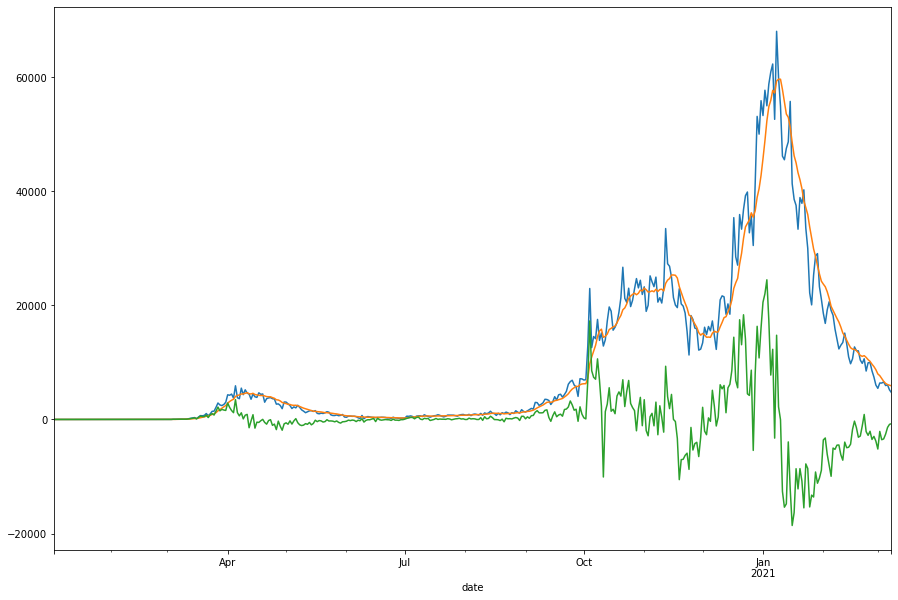

In [42]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_yscale("linear")
cases_totals["newCasesByPublishDate"].plot(ax=ax)
cases_mvg_avg["newCasesByPublishDate"].xs("total", level=1).plot(ax=ax)
cases_mvg_avg_delta["newCasesByPublishDate"].xs("total", level=1).plot(ax=ax)
# cases_delta.xs("total", level=1).plot(ax=ax)

In [117]:
cases_delta

newCasesByPublishDate  newCasesBySpecimenDate  \
date       areaName                                                  
2021-02-04 Wales                       NaN                     NaN   
2021-02-03 Wales                       NaN                     NaN   
2021-02-02 Wales                       NaN                     NaN   
2021-02-01 Wales                       NaN                     NaN   
2021-01-31 Wales                       NaN                     NaN   
...                                    ...                     ...   
           total              -1273.714286             -272.000000   
2021-02-01 total               -512.571429            -1265.714286   
2021-02-02 total               -464.142857            -1552.000000   
2021-02-03 total               -872.285714            -3229.857143   
2021-02-04 total              -1149.428571            -3431.000000   

                     newCasesByPublishDateRollingRate  
date       areaName                                    
2021-02-04 Wales                                  NaN  
2021-02-03 Wales                                  NaN  
2021-02-02 Wales                                  NaN  
2021-02-01 Wales                                  NaN  
2021-01-31 Wales                                  NaN  
...                                               ...  
           total                           -48.728571  
2021-02-01 total                           -42.185714  
2021-02-02 total                           -37.142857  
2021-02-03 total                           -29.857143  
2021-02-04 total                           -27.742857  

[1995 rows x 3 columns]

In [43]:
POPULATION = 66650000
COLUMN_BASIS = "newCasesByPublishDateRollingRate"

In [44]:
infected = cases_totals.rolling(6).sum()
sus = -cases_totals.cumsum() + POPULATION
removed = cases_totals.shift(6).cumsum()

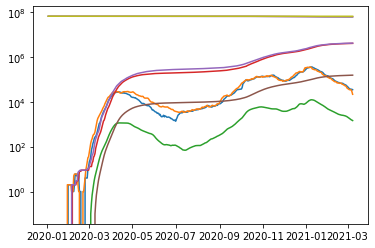

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale("log", base=10)
plt.plot(infected)
plt.plot(removed)
plt.plot(sus)

In [46]:
infected["ln_cases"] = np.log2(infected[COLUMN_BASIS])

C:\Users\fredd\anaconda3\envs\DS2020\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [47]:
# infected["m"] = (np.gradient(infected["ln_cases"], 7) + np.gradient(infected["ln_cases"], 6))/2
infected["m"] = np.gradient(infected["ln_cases"])

C:\Users\fredd\anaconda3\envs\DS2020\lib\site-packages\numpy\lib\function_base.py:1068: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)


<AxesSubplot:xlabel='date'>

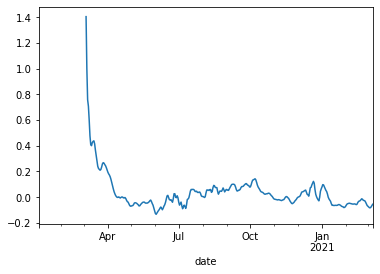

In [48]:
infected["m"].plot()

In [49]:
infected["gamma"] = removed.diff()[COLUMN_BASIS] / (infected[COLUMN_BASIS])

<AxesSubplot:xlabel='date'>

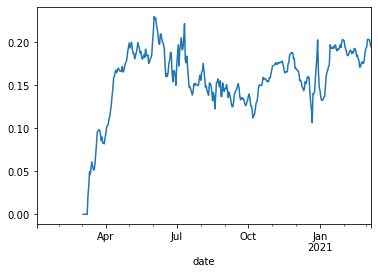

In [50]:
infected["gamma"].plot()

In [51]:
infected["newCasesByPublishDate"]

date
2020-01-03        NaN
2020-01-04        NaN
2020-01-05        NaN
2020-01-06        NaN
2020-01-07        NaN
               ...   
2021-03-04    38273.0
2021-03-05    36786.0
2021-03-06    36791.0
2021-03-07    36513.0
2021-03-08    34834.0
Name: newCasesByPublishDate, Length: 431, dtype: float64

In [52]:
infected["beta"] = infected["m"] + infected["gamma"]

<AxesSubplot:xlabel='date'>

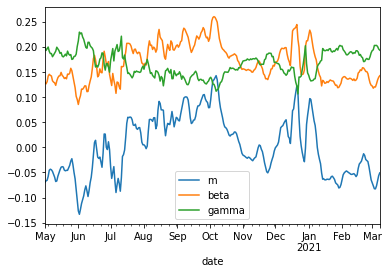

In [53]:
infected[["m", "beta", "gamma"]].loc["2020-05-1": pd.to_datetime('today')].plot()

In [54]:
infected["R"] = infected["beta"]/infected["gamma"]
infected["R_avg"] = infected.loc["2020-05-1": pd.to_datetime('today')]["R"].rolling(5).mean()
infected["R_ewm"] = infected["R"].ewm(alpha=0.5).mean()

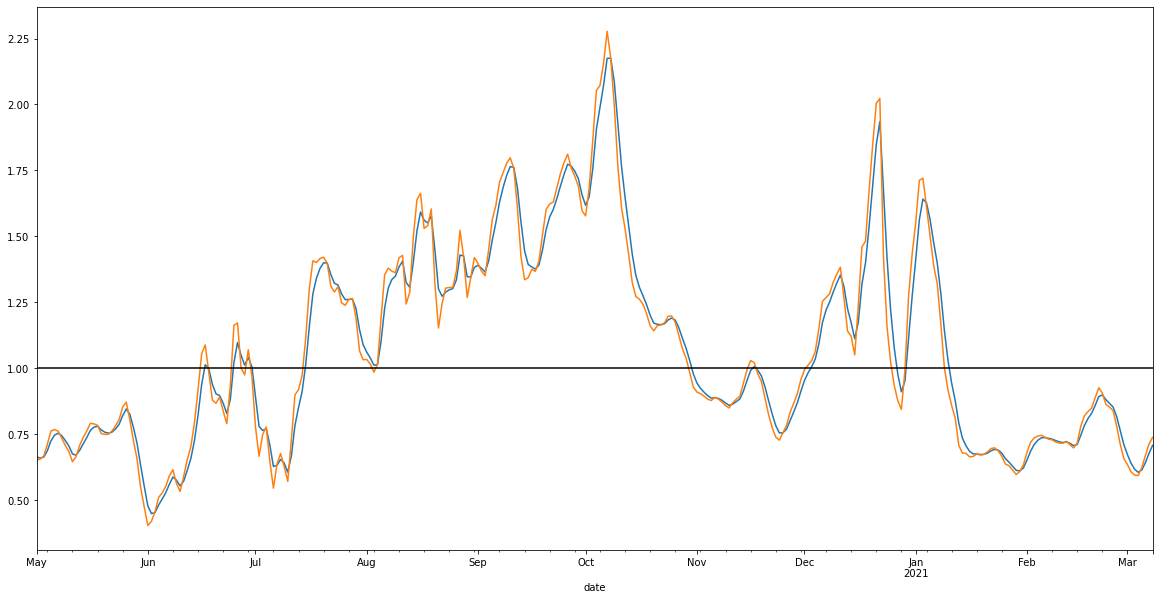

In [55]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(20,10))
infected["R_ewm"].loc["2020-05-1": pd.to_datetime('today')].plot(ax=ax)
infected["R"].loc["2020-05-1": pd.to_datetime('today')].plot(ax=ax)
ax.axhline(1, color="black")

In [56]:
infected["R_ewm"] 

date
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
2020-01-06         NaN
2020-01-07         NaN
                ...   
2021-03-04    0.604628
2021-03-05    0.613813
2021-03-06    0.641135
2021-03-07    0.676576
2021-03-08    0.706837
Name: R_ewm, Length: 431, dtype: float64

In [29]:
infected["R"] = infected["newCasesByPublishDate"] / 

SyntaxError: invalid syntax (<ipython-input-29-60254139e028>, line 1)